## Tic-Tac-Toe Agent
​
In this notebook, you will learn to build an RL agent (using Q-learning) that learns to play Numerical Tic-Tac-Toe with odd numbers. The environment is playing randomly with the agent, i.e. its strategy is to put an even number randomly in an empty cell. The following is the layout of the notebook:
        - Defining epsilon-greedy strategy
        - Tracking state-action pairs for convergence
        - Define hyperparameters for the Q-learning algorithm
        - Generating episode and applying Q-update equation
        - Checking convergence in Q-values

#### Importing libraries
Write the code to import Tic-Tac-Toe class from the environment file

In [1]:
## from <TC_Env> import <TicTacToe> - import your class from environment file
from TCGame_Env import TicTacToe   ## Importing TicTacToe class from 'TCGame_Env.py' file

import collections
import numpy as np
import random
import pickle
import time
from matplotlib import pyplot as plt
%matplotlib inline

## Define environment as env
env= TicTacToe()  #Instantiation

In [2]:
# Function to convert state array into a string to store it as keys in the dictionary
# states in Q-dictionary will be of form: x-4-5-3-8-x-x-x-x
#   x | 4 | 5
#   ----------
#   3 | 8 | x
#   ----------
#   x | x | x

def Q_state(state):
    return ('-'.join(str(e) for e in state)).replace('nan','x')

In [3]:
## Defining a function which will return valid (all possible actions) actions corresponding to a state
## Important to avoid errors during deployment.

def valid_actions(state):

    valid_Actions = []
    
    valid_Actions = [i for i in env.action_space(state)[0]] ###### -------please call your environment as env
    return valid_Actions

In [4]:
## Defining a function which will add new Q-values to the Q-dictionary.(Initialization of Q-values at the start: Only for Agent) 
def add_to_dict(state):
    state1 = Q_state(state)
    if state1 not in Q_dict.keys():      
        valid_act = valid_actions(state)
        for action in valid_act:
            Q_dict[state1][action]=0

In [5]:
## Printing the default tic tac toe board positions
Q_state(env.state)

'x-x-x-x-x-x-x-x-x'

In [6]:
## Printing all the valid actions (all possible agent actions available at start)
valid_actions(env.state)

[(0, 1),
 (0, 3),
 (0, 5),
 (0, 7),
 (0, 9),
 (1, 1),
 (1, 3),
 (1, 5),
 (1, 7),
 (1, 9),
 (2, 1),
 (2, 3),
 (2, 5),
 (2, 7),
 (2, 9),
 (3, 1),
 (3, 3),
 (3, 5),
 (3, 7),
 (3, 9),
 (4, 1),
 (4, 3),
 (4, 5),
 (4, 7),
 (4, 9),
 (5, 1),
 (5, 3),
 (5, 5),
 (5, 7),
 (5, 9),
 (6, 1),
 (6, 3),
 (6, 5),
 (6, 7),
 (6, 9),
 (7, 1),
 (7, 3),
 (7, 5),
 (7, 7),
 (7, 9),
 (8, 1),
 (8, 3),
 (8, 5),
 (8, 7),
 (8, 9)]

In [7]:
##Number of all possible valid agent actions at start
len(valid_actions(env.state))

45

#### Epsilon-greedy strategy - Write your code here

(you can build your epsilon-decay function similar to the one given at the end of the notebook)

In [8]:
## Defining epsilon-greedy policy. You can choose any function epsilon-decay strategy

def epsilon_greedy_policy(state, time):
    epsilon = min_epsilon + (max_epsilon - min_epsilon) * np.exp(-decay_rate*time)  ##Based on the given epsilon-decay example
    
    z = np.random.random()  ##Takes random value [0,1)
        
    if z > epsilon:
        state1 = Q_state(state)
        action = max(Q_dict[state1],key=Q_dict[state1].get)   #Exploitation: this gets the action corresponding to max Q-value for the current state
    else:
        possible_actions = [i for i in env.action_space(state)[0]]        
        action = possible_actions[np.random.choice(range(len(possible_actions)))]    #Exploration: randomly choosing an action from all possible actions for the agent
    
    return action

#### Tracking the state-action pairs for checking convergence - write your code here

In [9]:
## Initialise Q_dictionary as 'Q_dict' and States_tracked as 'States_track' (for convergence)
Q_dict = collections.defaultdict(dict)
States_track =collections.defaultdict(dict)

In [10]:
## Initialising states to be tracked
def initialise_tracking_states():
    sample_state_action_Qvalues = [('x-x-x-x-x-x-x-x-x',(2,5)), ('x-x-9-x-x-6-x-x-x',(7,7)),
                       ('x-1-6-x-x-x-x-x-x',(0,9)),('x-1-x-x-x-x-2-x-x',(2,3))]    #Select some 4 Q-values
    for q_val in sample_state_action_Qvalues:
        state = q_val[0]
        action = q_val[1]
        States_track[state][action] = []

In [11]:
initialise_tracking_states()

In [12]:
States_track

defaultdict(dict,
            {'x-x-x-x-x-x-x-x-x': {(2, 5): []},
             'x-x-9-x-x-6-x-x-x': {(7, 7): []},
             'x-1-6-x-x-x-x-x-x': {(0, 9): []},
             'x-1-x-x-x-x-2-x-x': {(2, 3): []}})

In [13]:
## Listing states in 'State_track'
States_track.keys()

dict_keys(['x-x-x-x-x-x-x-x-x', 'x-x-9-x-x-6-x-x-x', 'x-1-6-x-x-x-x-x-x', 'x-1-x-x-x-x-2-x-x'])

In [14]:
## Action/s within the state
States_track['x-x-x-x-x-x-x-x-x'].keys()

dict_keys([(2, 5)])

In [15]:
## Defining a function to save the Q-dictionary as a pickle file

def save_obj(obj, name ):
    with open(name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

In [16]:
def save_tracking_states():
    for state in States_track.keys():
        for action in States_track[state].keys():
            if state in Q_dict and action in Q_dict[state]:
                States_track[state][action].append(Q_dict[state][action])

#### Define hyperparameters  ---write your code here

In [17]:
## Defining hyperparameters for the training

EPISODES = 400000 #40000            # total no. of episodes
LR = 0.01                     # learning rate
GAMMA = 0.9                   # discount factor

max_epsilon = 1.0             # Greed: 100%
min_epsilon = 0.001           # Min_Greed: 0.1%
decay_rate = 0.000002         # epsilon decay rate
threshold = 2500              # no. of episodes after which states_tracked will be saved
policy_threshold = 10000      # no of episodes after which Q dictionary/table will be saved

### Q-update loop ---write your code here

In [18]:

import time 
start_time = time.time()

for episode in range(EPISODES):
    ##### Start writing your code from the next line
    
    env = TicTacToe() # INstantitae an object
    curr_state = env.state    
    terminal = False  
    add_to_dict(curr_state)  # adding the current state to dictionary

    while terminal != True:  
        curr_state1 = Q_state(curr_state)
        curr_action = epsilon_greedy_policy(curr_state, episode) 
        next_state, reward, terminal = env.step(curr_state, curr_action) # get necessary paramters
        next_state_temp = Q_state(next_state)
        add_to_dict(next_state)


        # Updating rules
        if terminal != True:
            max_next = max(Q_dict[next_state_temp],key=Q_dict[next_state_temp].get)  
                #this gets the action corresponding to max q-value of next state
            Q_dict[curr_state1][curr_action] += LR * ((reward + (GAMMA*(Q_dict[next_state_temp][max_next])))
                                                      - Q_dict[curr_state1][curr_action] ) 
        else:
            Q_dict[curr_state1][curr_action] += LR * ((reward - Q_dict[curr_state1][curr_action]))

        # navigating to next state
        curr_state = next_state
        
     #states tracking   
    if ((episode+1)%threshold)==0:
        save_tracking_states()
        save_obj(States_track,'States_tracking')
        print(episode)     ## Tracking episode at step increment of threshold value

    if ((episode+1)% policy_threshold) == 0:  # Every 10000 episodes, the Q-dict will be saved
        save_obj(Q_dict,'Policy_Q_dict') 
    
    
elapsed_time = time.time() - start_time
save_obj(States_track,'States_tracked')   #States_tracked in 'States_tracked' file
save_obj(Q_dict,'Policy')                 #Q_table saved in 'Policy' file

2499
4999
7499
9999
12499
14999
17499
19999
22499
24999
27499
29999
32499
34999
37499
39999
42499
44999
47499
49999
52499
54999
57499
59999
62499
64999
67499
69999
72499
74999
77499
79999
82499
84999
87499
89999
92499
94999
97499
99999
102499
104999
107499
109999
112499
114999
117499
119999
122499
124999
127499
129999
132499
134999
137499
139999
142499
144999
147499
149999
152499
154999
157499
159999
162499
164999
167499
169999
172499
174999
177499
179999
182499
184999
187499
189999
192499
194999
197499
199999
202499
204999
207499
209999
212499
214999
217499
219999
222499
224999
227499
229999
232499
234999
237499
239999
242499
244999
247499
249999
252499
254999
257499
259999
262499
264999
267499
269999
272499
274999
277499
279999
282499
284999
287499
289999
292499
294999
297499
299999
302499
304999
307499
309999
312499
314999
317499
319999
322499
324999
327499
329999
332499
334999
337499
339999
342499
344999
347499
349999
352499
354999
357499
359999
362499
364999
367499
369999
372499
3

#### Check the Q-dictionary

In [19]:
Q_dict

defaultdict(dict,
            {'x-x-x-x-x-x-x-x-x': {(0, 1): -1.0833969068407687,
              (0, 3): -1.0829570300267048,
              (0, 5): -1.0829480913612015,
              (0, 7): -1.0830033712249592,
              (0, 9): -1.083086758904669,
              (1, 1): -1.0829320530766156,
              (1, 3): -1.083390394365177,
              (1, 5): -1.0829635397659345,
              (1, 7): -1.0835295899008555,
              (1, 9): -1.0835939158171064,
              (2, 1): -1.0829304801833333,
              (2, 3): -1.0835142633118282,
              (2, 5): -1.0838644076679609,
              (2, 7): -1.0835091446754326,
              (2, 9): -1.0832571240794087,
              (3, 1): -1.08304277274698,
              (3, 3): -1.083010003344755,
              (3, 5): -1.0833147662423248,
              (3, 7): -1.0830143913934542,
              (3, 9): -1.083225795767622,
              (4, 1): -1.0830986543711787,
              (4, 3): -1.0830400599590275,
              (4, 5):

In [20]:
len(Q_dict)

800381

In [21]:
# Try checking for one of the states - that which action your agent thinks is the best  -----This will not be evaluated

#Random State Key
random_state_key= np.random.choice(list(Q_dict.keys()))
random_state_key

'x-2-6-7-x-x-x-x-3'

In [22]:
## Dictionary of all state-action pairs and their respective Q_values for the 'random_state_key' (i.e. any random state)
Q_val_rand = Q_dict[random_state_key]

## Creating tuples with action pairs and Q-values for 'random_state_key' (descending order)
sorted_tuples= sorted(Q_val_rand.items(), key= lambda item: item[1], reverse= True) 

## Created sorted dictionary of action and Q-value pairs using sorted_tuples
sorted_tups= {}
sorted_tups= {k:v for k,v in sorted_tuples}  #Sorted dictionary (reverse: descending order of values)
print(sorted_tuples)

[((0, 1), 0), ((0, 5), 0), ((0, 9), 0), ((4, 1), 0), ((4, 5), 0), ((4, 9), 0), ((5, 1), 0), ((5, 5), 0), ((5, 9), 0), ((6, 9), 0), ((7, 1), 0), ((7, 5), 0), ((7, 9), 0), ((6, 1), -0.01), ((6, 5), -0.01)]


In [23]:
##Selecting the best action for the state 'random_state_key' (Finding the action with max Q value for 'random_state_key')
import itertools

#Best action for the random_state_key
print(f"The best action for state '{random_state_key}' is:")
list(dict(itertools.islice(sorted_tups.items(), 1)).keys())[0]

The best action for state 'x-2-6-7-x-x-x-x-3' is:


(0, 1)

#### Check the states tracked for Q-values convergence
(non-evaluative)

<function matplotlib.pyplot.show(close=None, block=None)>

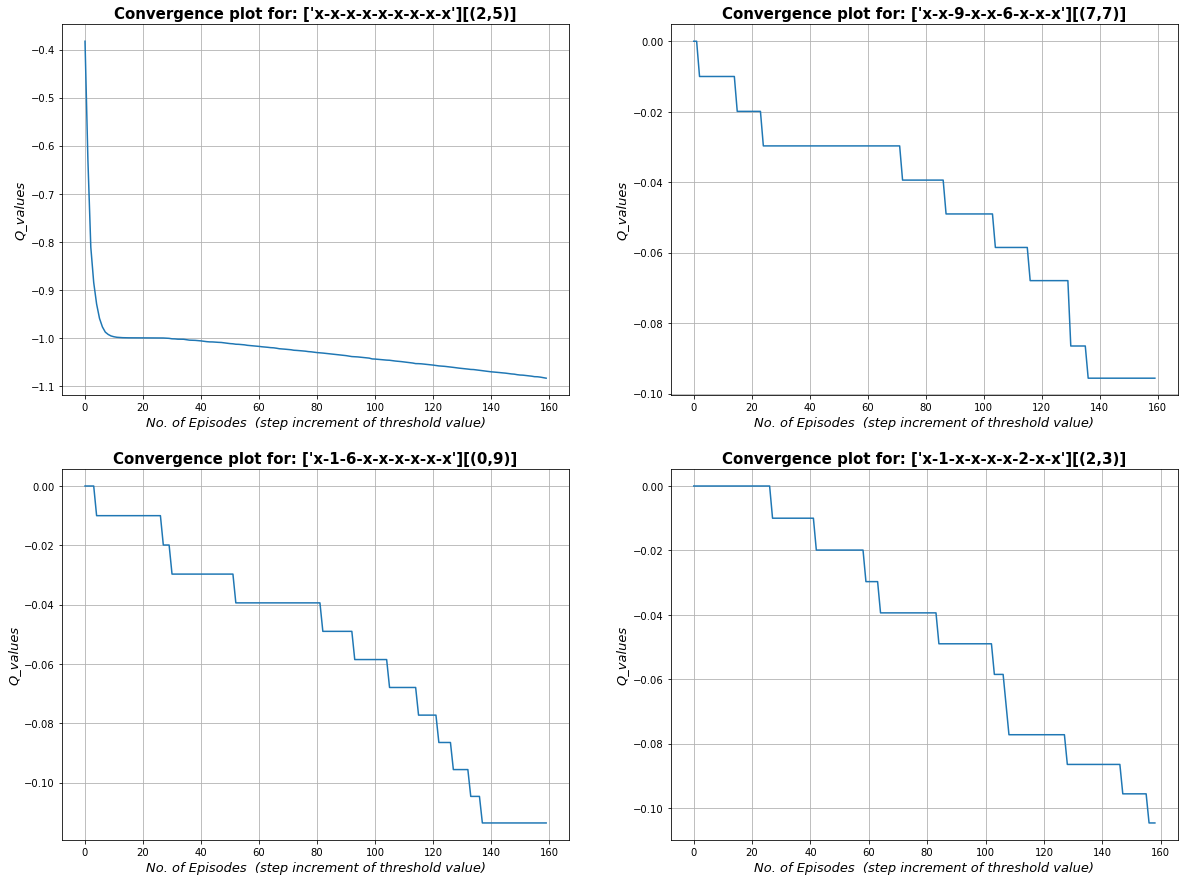

In [24]:
## Write the code for plotting the graphs for state-action pairs tracked

plt.figure(0, figsize=(20,15))

#Graph 1: Convergence Plot for state-action pair: ['x-x-x-x-x-x-x-x-x'][(2,5)]
x_axis = np.asarray(range(0, len(States_track['x-x-x-x-x-x-x-x-x'][(2,5)])))
plt.subplot(221)
plt.plot(x_axis,np.asarray(States_track['x-x-x-x-x-x-x-x-x'][(2,5)]))
plt.title("Convergence plot for: ['x-x-x-x-x-x-x-x-x'][(2,5)]", fontsize=15, fontweight='bold')
plt.ylabel("Q_values", fontsize=13, fontstyle='italic')
plt.xlabel("No. of Episodes  (step increment of threshold value)", fontsize=13, fontstyle='italic')
plt.grid(True)
plt.show

#Graph 2: Convergence Plot for state-action pair: ['x-x-9-x-x-6-x-x-x'][(7,7)]
x_axis = np.asarray(range(0, len(States_track['x-x-9-x-x-6-x-x-x'][(7,7)])))
plt.subplot(222)
plt.plot(x_axis,np.asarray(States_track['x-x-9-x-x-6-x-x-x'][(7,7)]))
plt.title("Convergence plot for: ['x-x-9-x-x-6-x-x-x'][(7,7)]", fontsize=15, fontweight='bold')
plt.ylabel("Q_values", fontsize=13, fontstyle='italic')
plt.xlabel("No. of Episodes  (step increment of threshold value)", fontsize=13, fontstyle='italic')
plt.grid(True)
plt.show

#Graph 3: Convergence Plot for state-action pair: ['x-1-6-x-x-x-x-x-x'][(0,9)]
x_axis = np.asarray(range(0, len(States_track['x-1-6-x-x-x-x-x-x'][(0,9)])))
plt.subplot(223)
plt.plot(x_axis,np.asarray(States_track['x-1-6-x-x-x-x-x-x'][(0,9)]))
plt.title("Convergence plot for: ['x-1-6-x-x-x-x-x-x'][(0,9)]", fontsize=15, fontweight='bold')
plt.ylabel("Q_values", fontsize=13, fontstyle='italic')
plt.xlabel("No. of Episodes  (step increment of threshold value)", fontsize=13, fontstyle='italic')
plt.grid(True)
plt.show

#Graph 4: Convergence Plot for state-action pair: ['x-1-x-x-x-x-2-x-x'][(2,3)]
x_axis = np.asarray(range(0, len(States_track['x-1-x-x-x-x-2-x-x'][(2,3)])))
plt.subplot(224)
plt.plot(x_axis,np.asarray(States_track['x-1-x-x-x-x-2-x-x'][(2,3)]))
plt.title("Convergence plot for: ['x-1-x-x-x-x-2-x-x'][(2,3)]", fontsize=15, fontweight='bold')
plt.ylabel("Q_values", fontsize=13, fontstyle='italic')
plt.xlabel("No. of Episodes  (step increment of threshold value)", fontsize=13, fontstyle='italic')
plt.grid(True)
plt.show

### Epsilon - Decay Check

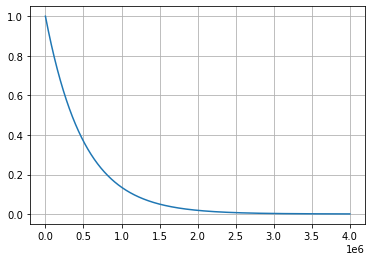

In [25]:
max_epsilon = 1.0      #Greedy 100%
min_epsilon = 0.001    #Min_epsilon: 0.001%
time = np.arange(0,4000000)  # 4e+6 episodes
epsilon = []
for i in range(0,4000000):
    epsilon.append(min_epsilon + (max_epsilon - min_epsilon) * np.exp(-0.000002*i))  

plt.plot(time, epsilon)
plt.grid(True)
plt.show()